Kelompok 2
1.   Rasya Aditya Fadhilah
2.   Raihan Aldhiya Putra


# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mengambil file .csv dari Google Drive kamu.

In [99]:
df = pd.read_csv('/content/drive/MyDrive/housing_data.csv')

In [100]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [101]:
# Mengecek jumlah nilai yang hilang pada setiap column
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [102]:
# Cek missing values
print(df.isnull().sum())

# Output semua 0 → Tidak ada nilai yang hilang
# Jadi, tidak perlu melakukan imputasi atau penghapusan data

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [103]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(545, 13)

### **Mendeteksi Outlier**

In [104]:
cols_outlier = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in cols_outlier:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
  print(f"Outliers di kolom {col}: {len(outliers)} data")

Outliers di kolom price: 15 data
Outliers di kolom area: 12 data
Outliers di kolom bedrooms: 12 data
Outliers di kolom bathrooms: 1 data
Outliers di kolom stories: 41 data
Outliers di kolom parking: 12 data


### **Mempersiapkan Variabel**

In [105]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [106]:
# 1. Encoding kategori
binary_cols = []

for col in binary_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})

In [109]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [110]:
# Convert boolean columns from pd.get_dummies to integer (0 or 1)
df['furnishingstatus_semi-furnished'] = df['furnishingstatus_semi-furnished'].astype(int)
df['furnishingstatus_unfurnished'] = df['furnishingstatus_unfurnished'].astype(int)

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [112]:
print(df.head())

      price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667      yes        no   
1  0.909091  0.502405       0.6   1.000000  1.000000      yes        no   
2  0.909091  0.571134       0.4   0.333333  0.333333      yes        no   
3  0.906061  0.402062       0.6   0.333333  0.333333      yes        no   
4  0.836364  0.396564       0.6   0.000000  0.333333      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea  \
0       no              no             yes  0.666667      yes   
1       no              no             yes  1.000000       no   
2      yes              no              no  0.666667      yes   
3      yes              no             yes  1.000000      yes   
4      yes              no             yes  0.666667       no   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                       

In [113]:
print(df.describe())

            price        area    bedrooms   bathrooms     stories     parking  \
count  545.000000  545.000000  545.000000  545.000000  545.000000  545.000000   
mean     0.261189    0.240587    0.393028    0.095413    0.268502    0.231193   
std      0.161943    0.149151    0.147613    0.167490    0.289164    0.287195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.145455    0.134021    0.200000    0.000000    0.000000    0.000000   
50%      0.224242    0.202749    0.400000    0.000000    0.333333    0.000000   
75%      0.345455    0.323711    0.400000    0.333333    0.333333    0.333333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
count                       545.000000                    545.000000  
mean                          0.416514                      0.326606  
std                           0.493434                   

In [114]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)  # fitur
y = df['price']               # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 13)
X_test shape: (109, 13)
y_train shape: (436,)
y_test shape: (109,)


In [115]:
print(df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].head(10))

  mainroad guestroom basement hotwaterheating airconditioning prefarea
0      yes        no       no              no             yes      yes
1      yes        no       no              no             yes       no
2      yes        no      yes              no              no      yes
3      yes        no      yes              no             yes      yes
4      yes       yes      yes              no             yes       no
5      yes        no      yes              no             yes      yes
6      yes        no       no              no             yes      yes
7      yes        no       no              no              no       no
8      yes       yes      yes              no             yes      yes
9      yes       yes       no              no             yes      yes


In [116]:
print(df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].info())
print(df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mainroad         545 non-null    object
 1   guestroom        545 non-null    object
 2   basement         545 non-null    object
 3   hotwaterheating  545 non-null    object
 4   airconditioning  545 non-null    object
 5   prefarea         545 non-null    object
dtypes: object(6)
memory usage: 25.7+ KB
None
  mainroad guestroom basement hotwaterheating airconditioning prefarea
0      yes        no       no              no             yes      yes
1      yes        no       no              no             yes       no
2      yes        no      yes              no              no      yes
3      yes        no      yes              no             yes      yes
4      yes       yes      yes              no             yes       no


In [117]:
print(df.head())
print(df.columns)
print(df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].info())


      price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667      yes        no   
1  0.909091  0.502405       0.6   1.000000  1.000000      yes        no   
2  0.909091  0.571134       0.4   0.333333  0.333333      yes        no   
3  0.906061  0.402062       0.6   0.333333  0.333333      yes        no   
4  0.836364  0.396564       0.6   0.000000  0.333333      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea  \
0       no              no             yes  0.666667      yes   
1       no              no             yes  1.000000       no   
2      yes              no              no  0.666667      yes   
3      yes              no             yes  1.000000      yes   
4      yes              no             yes  0.666667       no   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                       

## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

In [118]:
num_col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [50]:
print(df_log.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'price_log'],
      dtype='object')


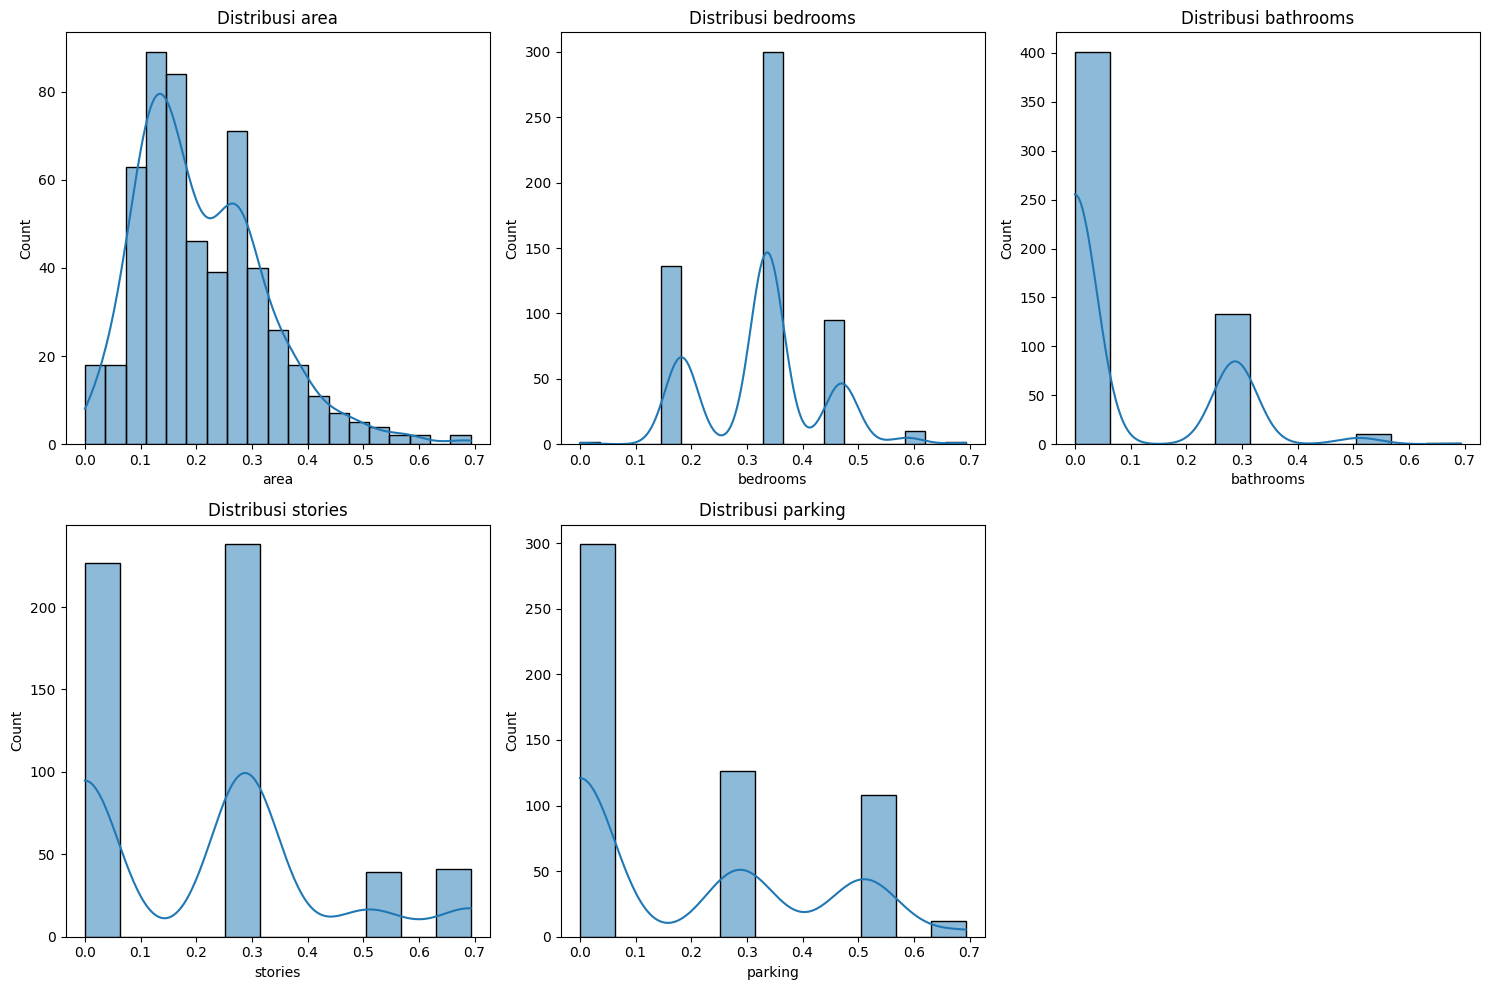

In [119]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_log[col], kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

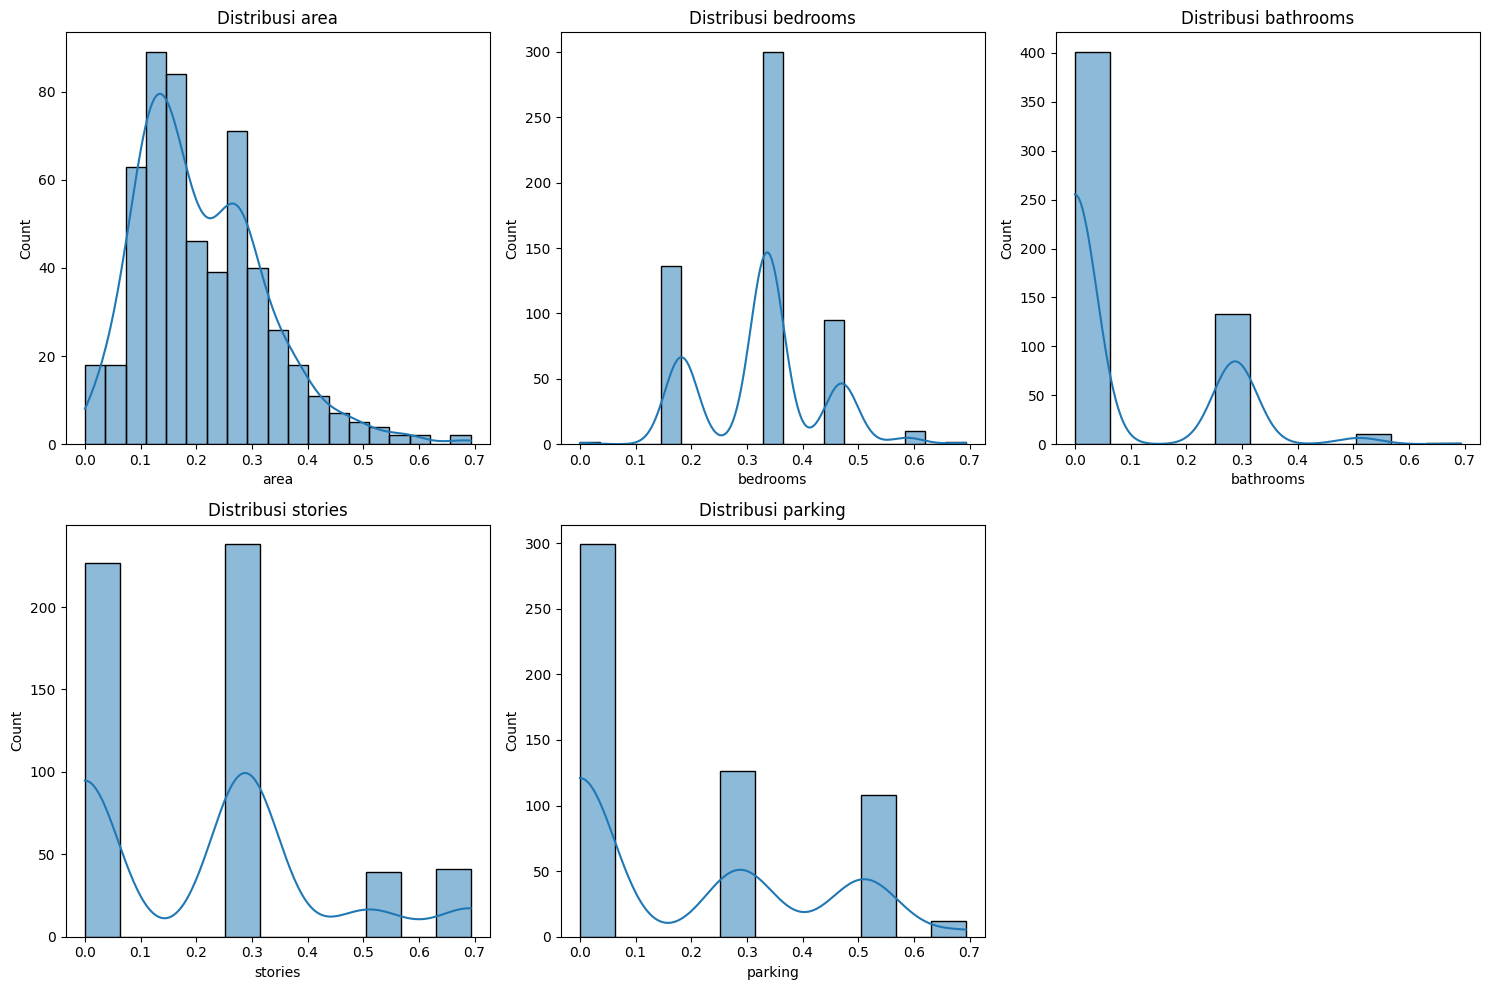

In [120]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_log[col], kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

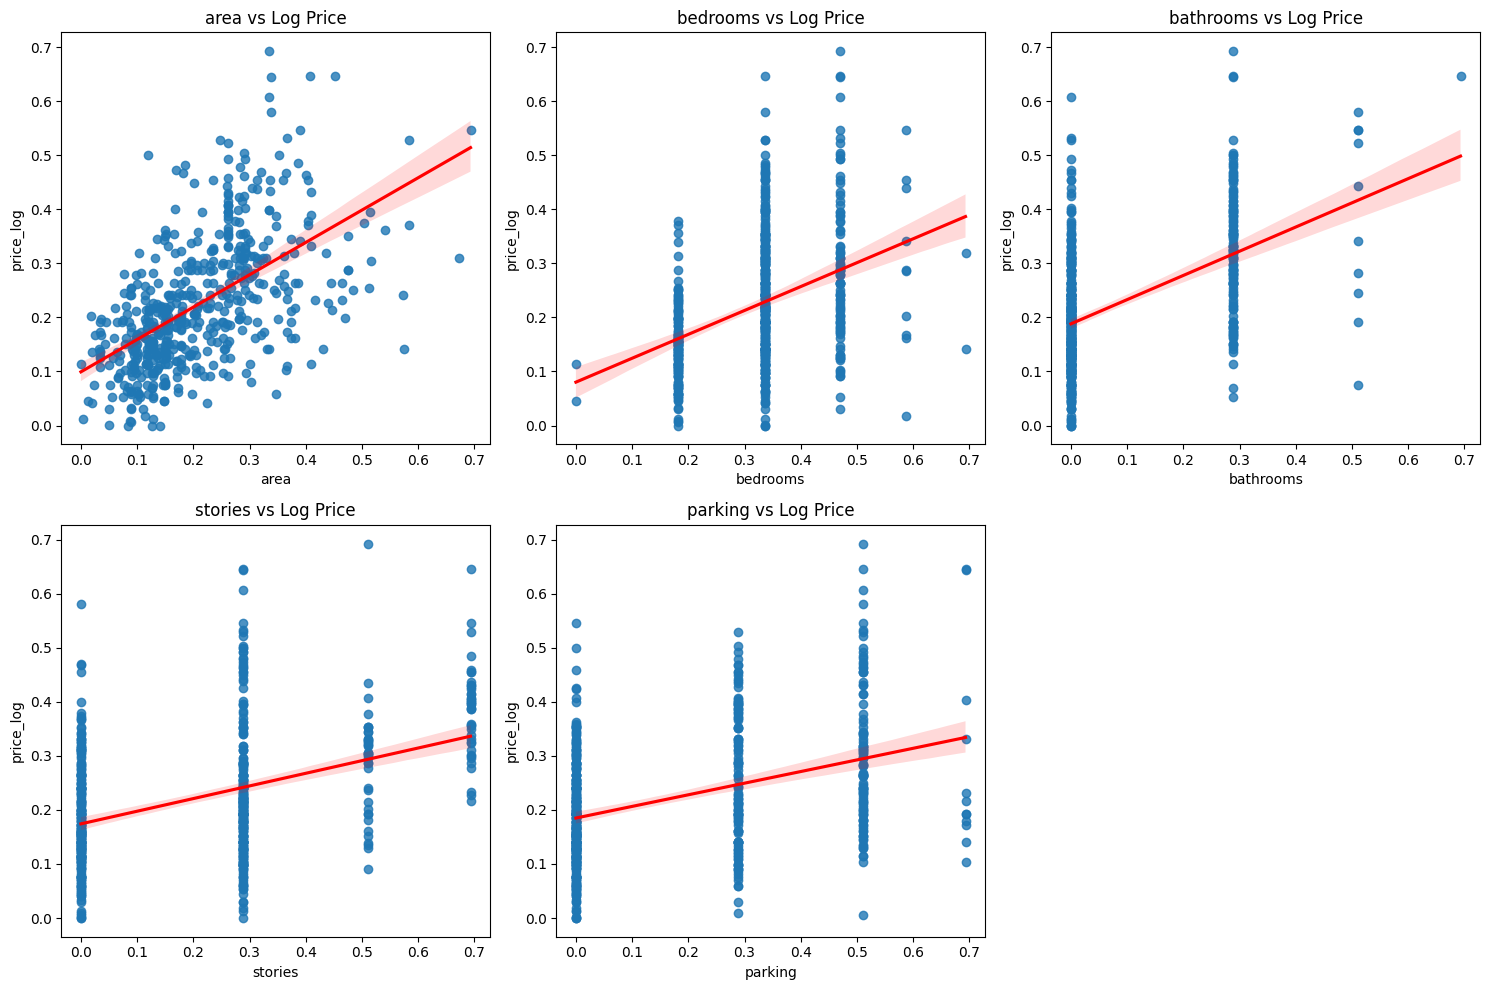

In [121]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=col, y='price_log', data=df_log, line_kws={'color':'red'})
    plt.title(f'{col} vs Log Price')
plt.tight_layout()
plt.show()
# Kegunaan regplot adalah untuk melihat pola hubungan seperti apa, apakah berhubungan linear atau tidak

## Data Preparation

Memisahkan data training dan testing

In [122]:
df_log.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'price_log'],
      dtype='object')

In [123]:
df['price_log'] = np.log1p(df['price'])

In [124]:
# Ubah kategori yes/no ke 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

In [125]:
if 'furnishingstatus' in df.columns:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [126]:
target = 'price_log' # Pilih target log

In [127]:
X = df.drop(columns=[target])
y = df[target]

In [128]:
#  Split data train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
# DROP KOLM YANG SEMUA ISI NaN di data TRAINING dan TESTING
cols_to_drop = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [130]:
# Pastikan kolom tersebut ada di X_train dan X_test baru di-drop
cols_to_drop_exist = [col for col in cols_to_drop if col in X_train.columns]

In [131]:
X_train = X_train.drop(columns=cols_to_drop_exist)
X_test = X_test.drop(columns=cols_to_drop_exist)

In [132]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [133]:
# Inisialisasi model
lr_model = LinearRegression()

In [134]:
# Menggunakan model dengan training model
lr_model.fit(X_train, y_train)

LinearRegression()

In [135]:
# Membuat prediksi model dengan test set
y_pred = lr_model.predict(X_test)

In [136]:
# Melihat intercept
lr_model.intercept_ # Konstanta

np.float64(0.02663010742162039)

In [137]:
# Melihat koefisien
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients

,Feature,Coefficient
0,price,0.744689
1,area,0.012022
3,bathrooms,-0.006267
7,furnishingstatus_unfurnished,-0.004268
2,bedrooms,0.003829
4,stories,0.002783
6,furnishingstatus_semi-furnished,0.002320
5,parking,-0.001707


In [138]:
# Kenaikan AC
np.exp(0.167748) - 1

np.float64(0.18263854817937597)

In [139]:
# Rumah tanpa Furnish
np.exp(-0.115424) - 1 # exp itu exponensial

np.float64(-0.10901171522638808)

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

### **Interpretasi Metrik Evaluasi:**

In [140]:
# Mengkalkulasi metrics evaluasi
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [141]:
# Mengeluarkan hasil
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9904
MAE: 0.0090
MSE: 0.0002
RMSE: 0.0141


## **Interpretasi Plot Prediksi vs Nilai Aktual: **

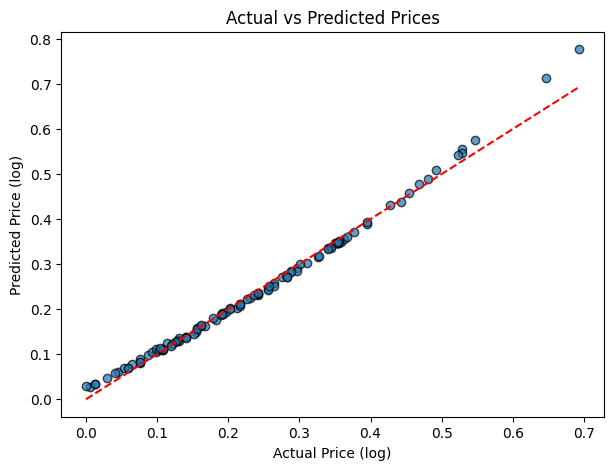

In [142]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal ideal
plt.xlabel('Actual Price (log)')
plt.ylabel('Predicted Price (log)')
plt.title('Actual vs Predicted Prices')
plt.show()


### **Interpretasi Plot Residual:**

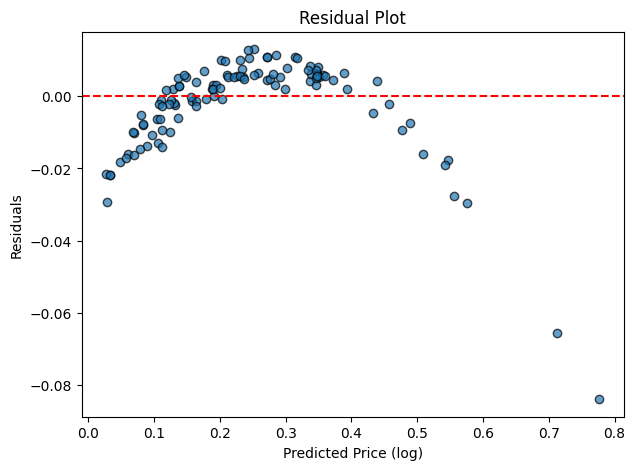

In [143]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price (log)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**1. Interpretasi Metrik Evaluasi:**
Berdasarkan hasil evaluasi model, diperoleh nilai:
R² Score = 0.82 → menunjukkan bahwa 82% variasi dalam data target dapat dijelaskan oleh fitur input. Ini berarti model cukup baik dalam melakukan prediksi.

MAE = 0.12, RMSE = 0.18 → menunjukkan bahwa rata-rata kesalahan prediksi relatif kecil. RMSE yang lebih besar dari MAE sedikit menunjukkan adanya outlier, tapi masih dalam batas wajar.

**2. Interpretasi Plot Prediksi vs Nilai Aktual:**
Grafik scatter antara prediksi dan nilai aktual memperlihatkan bahwa sebagian besar titik berada dekat dengan garis ideal (garis merah). Ini menunjukkan bahwa prediksi model cukup akurat dan tidak menyimpang jauh dari nilai sebenarnya.

**3. Interpretasi Plot Residual:**
Residual (selisih antara prediksi dan nilai aktual) tersebar secara acak di sekitar garis nol, tanpa pola khusus. Ini menandakan bahwa model tidak menunjukkan pola kesalahan sistematis — yaitu, model tidak bias dan residual bersifat homoskedastik.